# Imports and font/color setup

In [316]:
import random
import os

In [317]:
import pandas as pd, numpy as np, string, re
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.font_manager as fm 
from datetime import timedelta, datetime as dt
import matplotlib.gridspec as gridspec
%matplotlib inline
# %matplotlib notebook

In [318]:
pd.set_option('display.max_columns', 30)

In [319]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [320]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [321]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


In [322]:
users = []
scrobbles_file_names = []

user_dict = {}
user_dicts = []

In [323]:
for root, dirs, files in os.walk("../../Datasets/lastfm-20210829/", topdown=True):
    for dir_name in dirs:
        users.append(dir_name)
    for file_name in files:
        scrobbles_file_names.append(file_name)


In [324]:
for user in users:
    for file_name in scrobbles_file_names:
        
        details_dict = {}

        if file_name.split('-')[1] == user and file_name.split('-')[0] == 'scrobbles':
            user_dict[user] = file_name
            details_dict['user'] = user
            details_dict['file_name'] = file_name
            user_dicts.append(details_dict)

In [325]:
user_dict

{'woosteresque': 'scrobbles-woosteresque-1632684543.csv',
 'Twoh3ad3db0y': 'scrobbles-Twoh3ad3db0y-1630228825.csv',
 'Shubhankar0808': 'scrobbles-Shubhankar0808-1632816024.csv',
 'Dracaeryn': 'scrobbles-Dracaeryn-1632773882.csv',
 'SidSaxena': 'scrobbles-SidSaxena-1630171399.csv',
 'voresoph': 'scrobbles-voresoph-1632825524.csv',
 'dhruva93': 'scrobbles-dhruva93-1631895366.csv',
 'sam11235': 'scrobbles-sam11235-1630240335.csv',
 'axaytsg': 'scrobbles-axaytsg-1630249815.csv',
 'Rockgrenade': 'scrobbles-Rockgrenade-1630148679.csv',
 'tarun_verma08': 'scrobbles-tarun_verma08-1624153680.csv'}

In [326]:
user_dicts

[{'user': 'woosteresque',
  'file_name': 'scrobbles-woosteresque-1632684543.csv'},
 {'user': 'Twoh3ad3db0y',
  'file_name': 'scrobbles-Twoh3ad3db0y-1630228825.csv'},
 {'user': 'Shubhankar0808',
  'file_name': 'scrobbles-Shubhankar0808-1632816024.csv'},
 {'user': 'Dracaeryn', 'file_name': 'scrobbles-Dracaeryn-1632773882.csv'},
 {'user': 'SidSaxena', 'file_name': 'scrobbles-SidSaxena-1630171399.csv'},
 {'user': 'voresoph', 'file_name': 'scrobbles-voresoph-1632825524.csv'},
 {'user': 'dhruva93', 'file_name': 'scrobbles-dhruva93-1631895366.csv'},
 {'user': 'sam11235', 'file_name': 'scrobbles-sam11235-1630240335.csv'},
 {'user': 'axaytsg', 'file_name': 'scrobbles-axaytsg-1630249815.csv'},
 {'user': 'Rockgrenade', 'file_name': 'scrobbles-Rockgrenade-1630148679.csv'},
 {'user': 'tarun_verma08',
  'file_name': 'scrobbles-tarun_verma08-1624153680.csv'}]

In [327]:
username = user_dicts[7]['user']
file_name = user_dicts[7]['file_name']

# General top artists/songs analysis

In [328]:
scrobbles = pd.read_csv(f'../../Datasets/lastfm-20210829/{username}/{file_name}')

In [329]:
print(f"{username} Total Scrobbles: {len(scrobbles)}")
print(f"{username} Total Artists: {scrobbles['artist'].nunique()}")

sam11235 Total Scrobbles: 34887
sam11235 Total Artists: 2924


In [330]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['utc_time'])
# scrobbles = scrobbles.drop('datetime', axis=1)
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize('UTC')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_convert('Asia/Kolkata')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize(None)

In [331]:
scrobbles['year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['year-month'] = scrobbles['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
scrobbles['day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dow'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)


# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# scrobbles['dow'] = scrobbles['dow'].map(dmap)

In [332]:
year_counts = scrobbles['year'].value_counts().sort_index()

In [333]:
year_counts = scrobbles['year'].value_counts().sort_index()
ylim = max(year_counts) + 5000

In [334]:
year_counts

2016       33
2017     2118
2018     5939
2019     9170
2020    11035
2021     6592
Name: year, dtype: int64

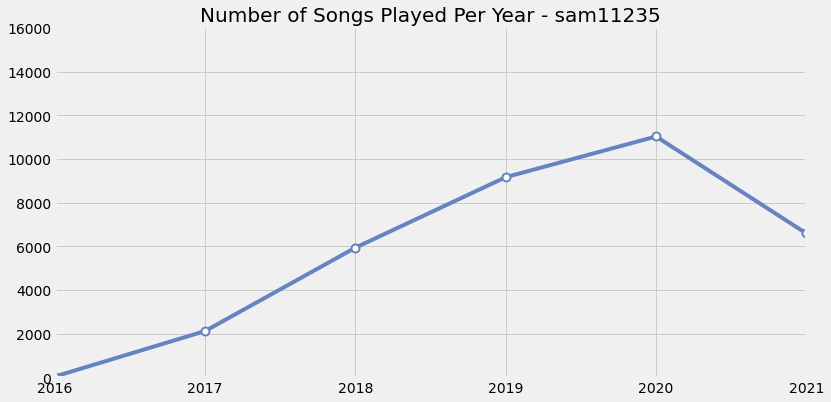

In [336]:
ax = year_counts.plot(kind='line', figsize=(12,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, ylim)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title(f'Number of Songs Played Per Year - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/scrobbles-per-year-{username}', dpi=96, bbox_inches='tight')
plt.show()

In [337]:
min_year = min(scrobbles['year'])
max_year = max(scrobbles['year'])
years = scrobbles['year'].unique()[::-1].tolist()

In [338]:
month_counts = scrobbles['month'].value_counts().sort_index()
month_counts

1     3561
2     3789
3     3196
4     2181
5     3225
6     3114
7     3114
8     2945
9     2812
10    1727
11    2254
12    2969
Name: month, dtype: int64

In [339]:
idx = []

for year in years:
    idx.append((scrobbles['month'][scrobbles['year'] == year]).value_counts().sort_index())

In [340]:
month_counts = scrobbles['year-month'].value_counts().sort_index()

date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

In [341]:
ylim = max(month_counts) + 1000

FileNotFoundError: [Errno 2] No such file or directory: 'images/{username}/lastfm-scrobbles-per-month-{username}.png'

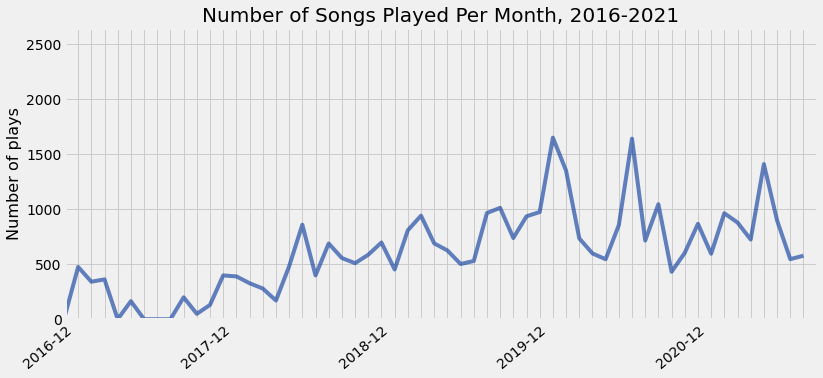

In [343]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)))

ax.yaxis.grid(True)
ax.set_ylim((0,ylim))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of Songs Played Per Month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/{username}/lastfm-scrobbles-per-month-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [344]:
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [345]:
dow_counts
ylim = max(dow_counts) + 2000

FileNotFoundError: [Errno 2] No such file or directory: '{username}/images/lastfm-scrobbles-per-weekday{username}.png'

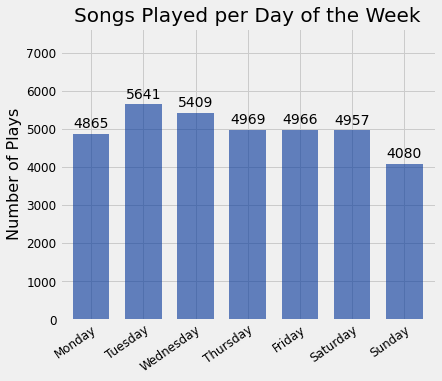

In [346]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, ylim))
ax.set_title('Songs Played per Day of the Week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('images/{username}/lastfm-scrobbles-per-weekday-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [ ]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ylim = max(hour_counts) + 2000


In [ ]:
hour_counts = scrobbles['hour'].value_counts().sort_index()

order = hour_counts.index[6:].tolist() + hour_counts.index[:6].tolist()

ylim = max(hour_counts) + 1000

ordered_hour_counts = hour_counts[order]

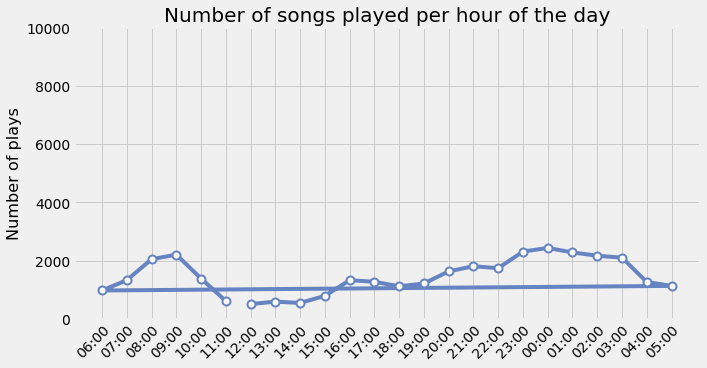

In [ ]:
ax = ordered_hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = ordered_hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, 10000))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

# plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

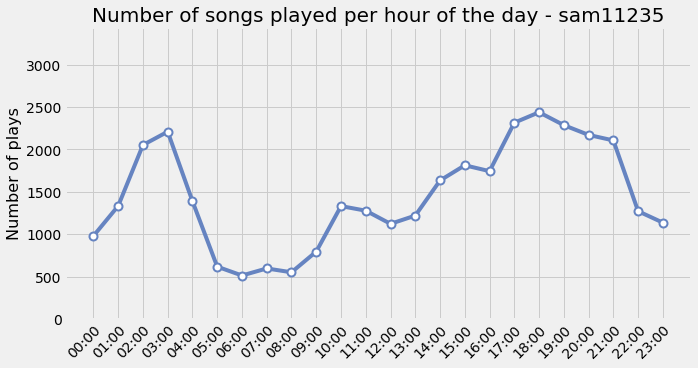

In [ ]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, ylim))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of songs played per hour of the day - {username}', fontproperties=title_font)

plt.savefig('{username}/images/lastfm-scrobbles-per-hour-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [ ]:
day_hour_counts = scrobbles.groupby(['dow', 'hour']).count()['track']
hour_numbers = day_hour_counts.index.levels[1]
day_numbers = day_hour_counts.index.levels[0]
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [ ]:
ylim = max(day_hour_counts) + 200

In [ ]:
day_numbers

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dow')

In [ ]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

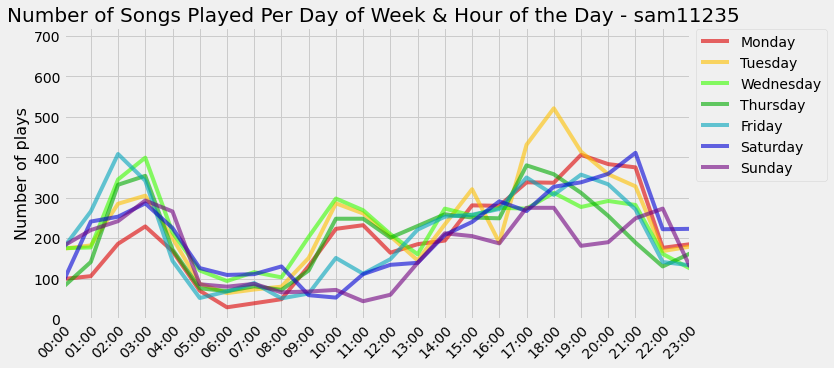

In [ ]:
fig, ax = plt.subplots(figsize=[12, 8])
lines = []
for day, c in zip(day_numbers, colors):
    ax = day_hour_counts[day].plot(kind='line', figsize=[10, 5], linewidth=4, alpha=0.6, color=c)
    lines.append(day_names[day])

xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim(hour_numbers[0], hour_numbers[-1])

ax.yaxis.grid(True)

ax.set_ylim([0, ylim])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of Songs Played Per Day of Week & Hour of the Day - {username} ', fontproperties=title_font)

ax.legend(lines, loc='best', bbox_to_anchor=(1.23,1.017))

plt.savefig('images/{username}/lastfm-scrobbles-days-hours-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [ ]:
artists = scrobbles['artist'].value_counts()

artists = pd.DataFrame(artists.reset_index().rename(columns={'index': 'artist', 'artist': 'play count'}))

artists.index = [n + 1 for n in artists.index]
artists.head(25)

,artist,play count
1,Pink Floyd,1366
2,Eden,939
3,The Beatles,813
4,Arctic Monkeys,652
5,Hans Zimmer,592
6,Linkin Park,511
7,Sufjan Stevens,367
8,AC/DC,364
9,Queen,339
10,Damien Rice,318


In [ ]:
tracks = scrobbles.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)

tracks = tracks.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]

tracks.index = [n + 1 for n in tracks.index]

tracks.head(25)

,artist,track,play count
1,Eden,rock + roll,121
2,Eden,Wake Up,92
3,Pink Floyd,Comfortably Numb,91
4,Pink Floyd,Wish You Were Here,87
5,Damien Rice,The Blower's Daughter,77
6,Eden,XO,73
7,Hans Zimmer,Time,70
8,Johnny Cash,Hurt,65
9,Eden,Nocturne,60
10,Eden,End Credits,55


In [ ]:
albums = scrobbles.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums = albums.reset_index().rename(columns={'timestamp': 'play count'})[['artist', 'album', 'play count']]
albums.index = [n+1 for n in albums.index]

In [ ]:
albums.head(25)

,artist,album,play count
1,Pink Floyd,The Wall,423
2,Eden,I Think You Think Too Much of Me,367
3,Arctic Monkeys,AM,248
4,Pink Floyd,The Dark Side of the Moon,248
5,Eden,End Credits,235
6,The Beatles,The Beatles 1967 - 1970 (Remastered),229
7,Pink Floyd,The Division Bell,203
8,Pink Floyd,Wish You Were Here,182
9,Damien Rice,O,159
10,Hans Zimmer,Inception (Music from the Motion Picture),146


In [ ]:
month = scrobbles[scrobbles['year-month'].isin(['2017-03'])]

In [ ]:
artists_month = month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Eden,90
2,Arctic Monkeys,23
3,Linkin Park,20
4,Eminem,16
5,Ed Sheeran,12
6,Alex Turner,10
7,The Tallest Man on Earth,8
8,Linn Brikell,8
9,The Beatles,7
10,Oasis,5


In [ ]:
tracks_month = month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(25)

,artist,track,play count
1,Eden,rock + roll,19
2,Eden,Fumes,18
3,Eden,XO,12
4,Eden,Circles,9
5,Eden,drugs,9
6,Eminem,Not Afraid,8
7,Linn Brikell,Get Lucky - Acoustic,8
8,Linkin Park,Roads Untraveled,6
9,Eden,End Credits,6
10,Eden,and,6


In [ ]:
albums_month = month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Eden,I Think You Think Too Much of Me,76
2,Arctic Monkeys,Favourite Worst Nightmare (Standard Version),16
3,Linkin Park,Living Things,12
4,Eminem,Recovery,12
5,Eden,End Credits,12
6,Alex Turner,Submarine (original songs),10
7,Linn Brikell,Get Lucky (Acoustic),8
8,Arctic Monkeys,AM,6
9,Seafret,Oceans - EP,5
10,Ed Sheeran,+,5


In [ ]:
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

NameError: name 'artists_most' is not defined

In [ ]:
colors = get_colors('Dark2', n)

In [ ]:
fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

In [ ]:
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ', '')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

In [ ]:
ax = first_letters.plot(kind='bar', figsize=[10,6], width = 0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)

ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')

plt.show()

In [ ]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

In [ ]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()